<a href="https://colab.research.google.com/github/RCNXV/RevoU-Mini-Course/blob/main/Salary_dataset_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#File Unloading

In [35]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [36]:
salary = pd.read_csv('/content/drive/MyDrive/Kerja/DA/Portofolio/RevoU Mini  Course/Dataset/salary_dataset.csv')
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Developer,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Developer,150000,USD,150000,US,50,US,L


In [37]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


#Data Cleansing

1. Remove duplicate

In [38]:
salary_cleaned = salary.copy()

In [39]:
salary_cleaned = salary_cleaned.drop_duplicates()
salary_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           562 non-null    int64 
 1   experience_level    562 non-null    object
 2   employment_type     562 non-null    object
 3   job_title           562 non-null    object
 4   salary              562 non-null    int64 
 5   salary_currency     562 non-null    object
 6   salary_in_usd       562 non-null    int64 
 7   employee_residence  562 non-null    object
 8   remote_ratio        562 non-null    int64 
 9   company_location    562 non-null    object
 10  company_size        562 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.7+ KB


2. Handling Missing Value

In [40]:
salary_cleaned.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing value in it.

3. Remove unnecessary data/columns

Delete the 'salary' and 'salary_currency' columns because there is already a 'salary_in_usd' column which is the result of both columns. 

In [41]:
salary_cleaned = salary_cleaned.drop(['salary','salary_currency'], axis=1)

4. Rename some values

in the 'remote_ratio' column there are 3 different values, namely 0 for WFO, 50 for Hybrid, and 100 for WFH. Because the abbreviation is not very clear, the value is replaced according to its meaning.

In [42]:
salary_cleaned['remote_ratio'] = salary_cleaned['remote_ratio'].replace({0:'WFO', 50:'Hybrid', 100:'WFH'})

5. Outlier Checking

Check outliers in the 'salary_in_usd' column

<Axes: >

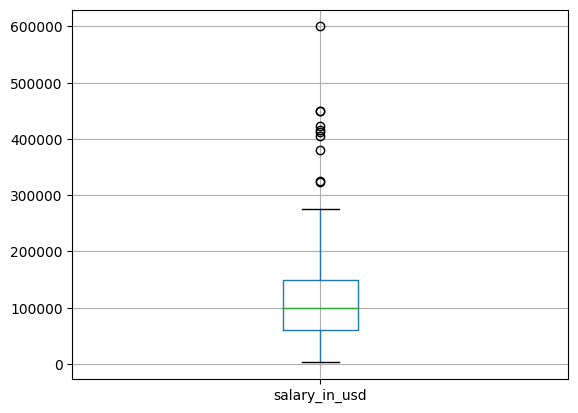

In [44]:
salary_cleaned.boxplot(column='salary_in_usd')

In [47]:
salary_cleaned['salary_in_usd'].describe()

count       562.000000
mean     110552.604982
std       72432.048596
min        2859.000000
25%       60189.250000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

to eliminate outliers, use the IQR formula

In [49]:
q1 = salary_cleaned['salary_in_usd'].quantile(0.25)
q3 = salary_cleaned['salary_in_usd'].quantile(0.75)

lower_limit = q1 - (1.5 * (q3 - q1))
upper_limit = q3 + (1.5 * (q3 - q1))

In [51]:
salary_cleaned = salary_cleaned[salary_cleaned['salary_in_usd'] > lower_limit]
salary_cleaned = salary_cleaned[salary_cleaned['salary_in_usd'] < upper_limit]
salary_cleaned['salary_in_usd'].describe()

count       552.000000
mean     104973.847826
std       59082.568806
min        2859.000000
25%       60000.000000
50%       99851.500000
75%      145250.000000
max      276000.000000
Name: salary_in_usd, dtype: float64

<Axes: >

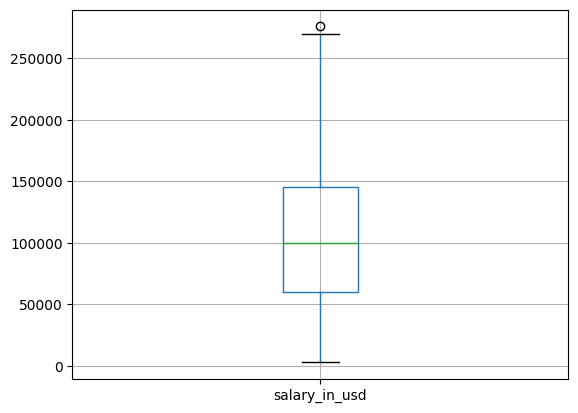

In [53]:
salary_cleaned.boxplot(column='salary_in_usd')

In [54]:
salary_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           552 non-null    int64 
 1   experience_level    552 non-null    object
 2   employment_type     552 non-null    object
 3   job_title           552 non-null    object
 4   salary_in_usd       552 non-null    int64 
 5   employee_residence  552 non-null    object
 6   remote_ratio        552 non-null    object
 7   company_location    552 non-null    object
 8   company_size        552 non-null    object
dtypes: int64(2), object(7)
memory usage: 43.1+ KB


Dataset is ready to use

#Exporting file

In [56]:
salary_cleaned.to_csv('salary_dataset_cleaned.csv')

from google.colab import files
files.download('salary_dataset_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>